In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [3]:
new_accidents = pd.read_csv("ACCIDENTS_AND_LOCATIONS.csv")

In [4]:
new_accidents.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,DIRECTORY,...,NODE_ID_y,NODE_TYPE,AMG_X,AMG_Y,LG_AREA_NAME,REGION_NAME,DEG_URBAN_NAME,LATITUDE,LONGITUDE,POSTCODE
0,12000033773,7/10/2000,18.10.00,3,Struck animal,7,Saturday,167,STRUCK ANIMAL,MEL,...,29360.0,N,2497770.513,2413464.984,MORELAND,METROPOLITAN NORTH WEST REGION,Metropolitan Excluding CBD,-37.77979,144.97469,3054.0
1,12001001925,3/01/2001,20.50.00,3,Struck animal,4,Wednesday,167,STRUCK ANIMAL,MEL,...,131904.0,N,2509892.996,2396930.786,KINGSTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.92871,145.11253,3169.0
2,12002039926,27/11/2002,10.30.00,3,Struck animal,4,Wednesday,167,STRUCK ANIMAL,MEL,...,141933.0,N,2501578.512,2405417.670,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.85230,145.01794,3143.0
3,12004005492,1/02/2004,19.45.00,3,Struck animal,1,Sunday,167,STRUCK ANIMAL,MEL,...,37458.0,I,2495332.798,2406005.117,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,Metropolitan Excluding CBD,-37.84700,144.94697,3206.0
4,12004009462,6/02/2004,19.30.00,3,Struck animal,6,Friday,167,STRUCK ANIMAL,MEL,...,48932.0,I,2499173.999,2405185.091,STONNINGTON,METROPOLITAN SOUTH EAST REGION,Metropolitan Excluding CBD,-37.85440,144.99061,3181.0


In [5]:
new_accidents.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X',
       'GRID_REFERENCE_Y', 'LIGHT_CONDITION', 'LIGHT_CONDITION_DESC',
       'NODE_ID_x', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2',
       'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'ROAD_GEOMETRY_DESC', 'SEVERITY',
       'SPEED_ZONE', 'NODE_ID_y', 'NODE_TYPE', 'AMG_X', 'AMG_Y',
       'LG_AREA_NAME', 'REGION_NAME', 'DEG_URBAN_NAME', 'LATITUDE',
       'LONGITUDE', 'POSTCODE'],
      dtype='object')

In [6]:
set(new_accidents.DEG_URBAN_NAME.tolist())

{'Country',
 'LARGE_PROVINCIAL_CITIES',
 'Large Provincial Cities',
 'MELB_URBAN',
 'Metropolitan Excluding CBD',
 'Other Towns',
 'RURAL_VICTORIA',
 'SMALL_CITIES',
 'SMALL_TOWNS',
 'Small Provincial Cities',
 'Small Towns',
 'TOWNS',
 nan}

In [7]:
rural_accidents = new_accidents.loc[new_accidents['DEG_URBAN_NAME'].isin(["RURAL_VICTORIA","SMALL_TOWNS","Country","Small Towns"])]


In [8]:
set(rural_accidents.LG_AREA_NAME.tolist())

{' ',
 '(MOUNT BULLER)',
 '(MOUNT STIRLING)',
 'ALPINE',
 'ARARAT',
 'BALLARAT',
 'BASS COAST',
 'BAW BAW',
 'BENALLA',
 'BENDIGO',
 'BRIMBANK',
 'BULOKE',
 'CAMPASPE',
 'CARDINIA',
 'CASEY',
 'CENTRAL GOLDFIELDS',
 'COLAC OTWAY',
 'CORANGAMITE',
 'EAST GIPPSLAND',
 'GANNAWARRA',
 'GEELONG',
 'GLENELG',
 'GOLDEN PLAINS',
 'HEPBURN',
 'HINDMARSH',
 'HORSHAM',
 'HUME',
 'INDIGO',
 'KNOX',
 'LATROBE',
 'LODDON',
 'MACEDON RANGES',
 'MANNINGHAM',
 'MANSFIELD',
 'MELTON',
 'MILDURA',
 'MITCHELL',
 'MOIRA',
 'MOORABOOL',
 'MORNINGTON PENINSULA',
 'MOUNT ALEXANDER',
 'MOYNE',
 'MURRINDINDI',
 'NILLUMBIK',
 'NORTHERN GRAMPIANS',
 'PYRENEES',
 'SHEPPARTON',
 'SOUTH GIPPSLAND',
 'SOUTHERN GRAMPIANS',
 'STRATHBOGIE',
 'SURF COAST',
 'SWAN HILL',
 'TOWONG',
 'WANGARATTA',
 'WARRNAMBOOL',
 'WELLINGTON',
 'WEST WIMMERA',
 'WHITTLESEA',
 'WODONGA',
 'WYNDHAM',
 'YARRA RANGES',
 'YARRIAMBIACK'}

In [9]:
rural_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 5 to 2374
Data columns (total 38 columns):
ACCIDENT_NO             2016 non-null object
ACCIDENT_DATE           2016 non-null object
ACCIDENT_TIME           2016 non-null object
ACCIDENT_TYPE           2016 non-null int64
ACCIDENT_TYPE_DESC      2016 non-null object
DAY_OF_WEEK             2016 non-null int64
DAY_WEEK_DESC           2016 non-null object
DCA_CODE                2016 non-null int64
DCA_DESC                2016 non-null object
DIRECTORY               2016 non-null object
EDITION                 2016 non-null object
PAGE                    2016 non-null object
GRID_REFERENCE_X        2016 non-null object
GRID_REFERENCE_Y        2016 non-null object
LIGHT_CONDITION         2016 non-null int64
LIGHT_CONDITION_DESC    2016 non-null object
NODE_ID_x               2016 non-null int64
NO_OF_VEHICLES          2016 non-null int64
NO_PERSONS              2016 non-null int64
NO_PERSONS_INJ_2        2016 non-null int64
N

In [11]:
rural_accidents.DEG_URBAN_NAME.replace(['Country', 'Small Towns'], ['RURAL_VICTORIA', 'SMALL_TOWNS'], inplace=True)


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
set(rural_accidents.DEG_URBAN_NAME.tolist())

{'RURAL_VICTORIA', 'SMALL_TOWNS'}

In [13]:
locations_array = rural_accidents[['LATITUDE', 'LONGITUDE']].values

In [14]:
locations_array

array([[-38.20817, 143.25117],
       [-38.7155 , 143.71346],
       [-37.85217, 142.27234],
       ...,
       [-38.09038, 145.465  ],
       [-37.22717, 145.01523],
       [-37.61945, 146.62868]])

In [16]:
national_parks = pd.read_csv("national_park.csv")

In [17]:
national_parks.tail()

,Name,TYPE ABBR,IUCN,Gazetted Area (ha),Area (ha),Declared,Latest Gazettal,Longitude,Latitude,IBRA Regions
41,The Lakes National Park,NP,II,"2,405","2,405",30/10/56,20/12/01,147.6670,-37.9876,SCP
42,Warby-Ovens National Park,NP,II,"14,706","14,708",27/06/10,27/06/10,146.1856,-36.2763,"NSS,RIV"
43,Wilsons Promontory National Park,NP,II,"48,244","48,202",8/07/1898,01/12/95,146.3671,-38.9599,"FUR,SCP"
44,Wyperfeld National Park,NP,II,"3,59,966","3,59,855",20/10/09,04/06/97,141.7584,-35.5849,MDD
45,Yarra Ranges National Park,NP,II,"77,218","77,229",15/12/95,15/12/95,146.0037,-37.6970,"AUA,SEH"


In [18]:
len(national_parks)

46

In [134]:
len(set(national_parks.Longitude))

46

In [39]:
natpark_array = national_parks[['Name','Latitude', 'Longitude']].values

In [40]:
natpark_array

array([['Alfred National Park', -37.5721, 149.3627],
       ['Alpine National Park', -37.0317, 147.3367],
       ['Barmah National Park', -35.8861, 145.0761],
       ['Baw Baw National Park', -37.8537, 146.3402],
       ['Brisbane Ranges National Park', -37.8411, 144.2397],
       ['Burrowa - Pine Mountain National Park', -36.0855, 147.7447],
       ['Chiltern-Mt Pilot National Park', -36.2488, 146.683],
       ['Churchill National Park', -37.9501, 145.2604],
       ['Cobboboonee National Park', -38.1144, 141.44],
       ['Coopracambra National Park', -37.3422, 149.3269],
       ['Croajingolong National Park', -37.65, 149.4833],
       ['Dandenong Ranges National Park', -37.8779, 145.3145],
       ['Errinundra National Park', -37.3447, 148.8416],
       ['French Island National Park', -38.3356, 145.3837],
       ['Grampians National Park', -37.2542, 142.4098],
       ['Great Otway National Park', -38.5977, 143.8603],
       ['Greater Bendigo National Park', -36.5212, 144.4419],
       

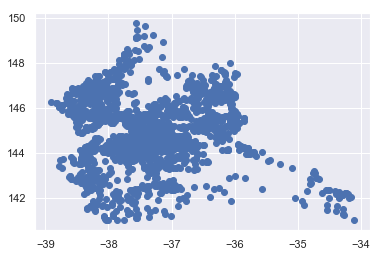

In [22]:
plt.scatter(locations_array[:,0],locations_array[:,1], label='True Position')  

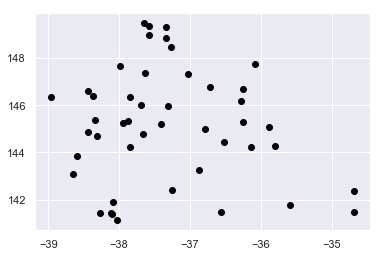

In [41]:
plt.scatter(natpark_array[:,1] ,natpark_array[:,2], color='black') 

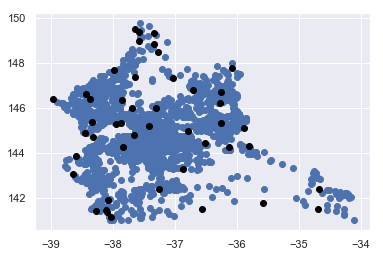

In [42]:
plt.scatter(locations_array[:,0],locations_array[:,1], label='True Position')
plt.scatter(natpark_array[:,1] ,natpark_array[:,2], color='black') 

In [27]:
#from scipy.spatial.distance import cdist, pdist

In [120]:
#orig = Point(-37.22717, 145.01523)

#dest1, dest2, dest3 = Point(-38.1144, 141.44), Point(-37.64  , 147.3534), Point(-35.5849, 141.7584)

In [121]:
#orig

In [122]:
#destinations = MultiPoint([dest1, dest2, dest3])

#print(destinations)
#MULTIPOINT (0 1.45, 2 2, 0 2.5)

In [123]:
#destinations

In [35]:
nearest_geoms = nearest_points(orig, destinations)

near_idx0 = nearest_geoms[0]

near_idx1 = nearest_geoms[1]

print(nearest_geoms)
#(<shapely.geometry.point.Point object at 0x000002A232089C50>, <shapely.geometry.point.Point object at 0x000002A232089860>)

print(near_idx0)
#POINT (1 1.67)

print(near_idx1)
#POINT (0 1.45)

(<shapely.geometry.point.Point object at 0x1a17229dd8>, <shapely.geometry.point.Point object at 0x1a17229c50>)
POINT (-37.22717 145.01523)
POINT (-37.64 147.3534)


In [ ]:
# locations_array
# natpark_array

In [45]:
#natpark_array[0][1]

-37.5721

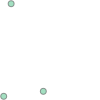

In [38]:
#MultiPoint([Point(-38.1144, 141.44), Point(-37.64  , 147.3534), Point(-35.5849, 141.7584)])

In [58]:
list1 = []

In [59]:
for i,j,k in natpark_array:
    list1.append(Point(j,k))

In [66]:
print(MultiPoint(list1))

MULTIPOINT (-37.5721 149.3627, -37.0317 147.3367, -35.8861 145.0761, -37.8537 146.3402, -37.8411 144.2397, -36.0855 147.7447, -36.2488 146.683, -37.9501 145.2604, -38.1144 141.44, -37.3422 149.3269, -37.65 149.4833, -37.8779 145.3145, -37.3447 148.8416, -38.3356 145.3837, -37.2542 142.4098, -38.5977 143.8603, -36.5212 144.4419, -35.8012 144.2842, -34.68 142.3707, -36.7816 144.9754, -36.8672 143.2628, -37.4136 145.2002, -37.3063 145.9865, -37.5798 148.9614, -36.5572 141.4914, -38.0295 141.1288, -38.0971 141.3892, -36.2569 145.3061, -37.64 147.3534, -38.4446 144.8584, -38.3655 146.3904, -36.7119 146.7747, -38.082 141.8848, -38.2661 141.4158, -34.6845 141.4794, -37.6675 144.7684, -38.3155 144.6835, -38.6466 143.0748, -37.271 148.4527, -38.4366 146.5885, -36.1338 144.2452, -37.9876 147.667, -36.2763 146.1856, -38.9599 146.3671, -35.5849 141.7584, -37.697 146.0037)


In [68]:
dest = MultiPoint(list1)

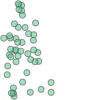

In [70]:
dest

In [83]:
print(dest)

MULTIPOINT (-37.5721 149.3627, -37.0317 147.3367, -35.8861 145.0761, -37.8537 146.3402, -37.8411 144.2397, -36.0855 147.7447, -36.2488 146.683, -37.9501 145.2604, -38.1144 141.44, -37.3422 149.3269, -37.65 149.4833, -37.8779 145.3145, -37.3447 148.8416, -38.3356 145.3837, -37.2542 142.4098, -38.5977 143.8603, -36.5212 144.4419, -35.8012 144.2842, -34.68 142.3707, -36.7816 144.9754, -36.8672 143.2628, -37.4136 145.2002, -37.3063 145.9865, -37.5798 148.9614, -36.5572 141.4914, -38.0295 141.1288, -38.0971 141.3892, -36.2569 145.3061, -37.64 147.3534, -38.4446 144.8584, -38.3655 146.3904, -36.7119 146.7747, -38.082 141.8848, -38.2661 141.4158, -34.6845 141.4794, -37.6675 144.7684, -38.3155 144.6835, -38.6466 143.0748, -37.271 148.4527, -38.4366 146.5885, -36.1338 144.2452, -37.9876 147.667, -36.2763 146.1856, -38.9599 146.3671, -35.5849 141.7584, -37.697 146.0037)


In [88]:
list2 = []

In [89]:
for i,j in locations_array:
    list2.append(Point(i,j))

In [90]:
orig = MultiPoint(list2)

In [91]:
print(orig)

MULTIPOINT (-38.20817 143.25117, -38.7155 143.71346, -37.85217 142.27234, -38.06925 144.033, -38.0254 144.35352, -37.86235 144.09443, -37.46393 142.57351, -37.51516 144.31171, -37.39518 143.77014, -37.66395 144.45549, -37.95862 143.16525, -37.38117 144.31695, -38.28085 142.99047, -38.31983 144.2191, -36.89853 141.64537, -37.70689 142.8517399999999, -38.46356 143.48377, -37.39303 144.41697, -37.88001 144.56807, -37.5337 143.88567, -37.82142 144.74941, -37.06823 143.74822, -36.64623 142.46344, -37.05485 142.44049, -38.04326 141.00744, -37.39411 142.06149, -37.27918 143.84341, -37.29441 143.78698, -38.26164 144.06996, -37.74422 144.29976, -38.12649 142.65774, -37.21172 144.1403, -37.58483 143.68416, -36.9275 142.43386, -36.89323 143.36568, -38.3956 142.76504, -38.21353 144.1396, -37.80859 141.90761, -37.76257 144.66524, -36.32968 142.40836, -37.01226 142.70102, -38.31165 143.6589, -38.14682 142.6919600000001, -36.92034 143.75685, -37.14025 142.51912, -38.20804 142.92413, -37.87665 144.256

In [105]:
origin_dest = []
for each in list2:
    origin_dest.append(nearest_points(each, dest))

In [108]:
nearest_np = []
incidents = []
for i,j in origin_dest:
    incidents.append(i)
    nearest_np.append(j)

In [109]:
len(incidents)

2016

In [110]:
len(nearest_np)

2016

In [115]:
print(nearest_np[0])

POINT (-38.6466 143.0748)


In [119]:
print(incidents[2015])

POINT (-37.61945 146.62868)


In [130]:
np_list_arrays = [ ((geom.xy[0][0], geom.xy[1][0])) for geom in nearest_np ]

np_lat = []
np_long = []
for array in np_list_arrays:
    np_lat.append(array[0])
    np_long.append(array[1])   

In [135]:
rural_accidents.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'ACCIDENT_TYPE_DESC', 'DAY_OF_WEEK', 'DAY_WEEK_DESC', 'DCA_CODE',
       'DCA_DESC', 'DIRECTORY', 'EDITION', 'PAGE', 'GRID_REFERENCE_X',
       'GRID_REFERENCE_Y', 'LIGHT_CONDITION', 'LIGHT_CONDITION_DESC',
       'NODE_ID_x', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2',
       'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'ROAD_GEOMETRY_DESC', 'SEVERITY',
       'SPEED_ZONE', 'NODE_ID_y', 'NODE_TYPE', 'AMG_X', 'AMG_Y',
       'LG_AREA_NAME', 'REGION_NAME', 'DEG_URBAN_NAME', 'LATITUDE',
       'LONGITUDE', 'POSTCODE'],
      dtype='object')

In [136]:
rural_accidents['NEAREST_NATIONALPARK_LAT'] = np_lat

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
rural_accidents['NEAREST_NATIONALPARK_LONG'] = np_long

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
national_parks.columns

Index(['Name', 'TYPE ABBR', 'IUCN', 'Gazetted Area (ha)', 'Area (ha)',
       'Declared', 'Latest Gazettal', 'Longitude', 'Latitude', 'IBRA Regions'],
      dtype='object')

In [141]:
dfinal = rural_accidents.merge(national_parks, left_on = 'NEAREST_NATIONALPARK_LAT',right_on = 'Latitude', how = 'left')


In [142]:
dfinal.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,DIRECTORY,...,Name,TYPE ABBR,IUCN,Gazetted Area (ha),Area (ha),Declared,Latest Gazettal,Longitude,Latitude,IBRA Regions
0,22000004456,22/01/2000,07.58.00,3,Struck animal,7,Saturday,167,STRUCK ANIMAL,VCS,...,Port Campbell National Park,NP,II,"2,406","2,404",09/12/64,22/10/08,143.0748,-38.6466,SCP
1,22000005220,4/02/2000,22.00.00,3,Struck animal,6,Friday,167,STRUCK ANIMAL,VCS,...,Great Otway National Park,NP,II,"1,04,034","1,03,985",11/12/05,02/10/12,143.8603,-38.5977,"SCP,SEH"
2,22000005532,6/02/2000,22.00.00,3,Struck animal,1,Sunday,167,STRUCK ANIMAL,VCS,...,Mount Eccles National Park,NP,II,"8,571","8,571",07/06/60,22/04/97,141.8848,-38.0820,"SCP,SVP"
3,22000007624,20/02/2000,00.15.00,3,Struck animal,1,Sunday,167,STRUCK ANIMAL,VCS,...,Brisbane Ranges National Park,NP,II,"8,879","8,880",01/12/75,06/09/77,144.2397,-37.8411,"SVP,VIM"
4,22000009094,7/03/2000,05.45.00,3,Struck animal,3,Tuesday,167,STRUCK ANIMAL,MEL,...,Brisbane Ranges National Park,NP,II,"8,879","8,880",01/12/75,06/09/77,144.2397,-37.8411,"SVP,VIM"


In [146]:
dfinal.to_csv("ACCIDENT_AND_NATIONALPARK.csv", index = False)